In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

In [1]:
import fraud_dataset

/home/kaifeng/miniconda3/envs/LAGAT/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Amazon Dataset Exploration

In [13]:
DATASET_NAME = "amazon" # "amazon" or "yelp"
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
RANDOM_SEED = 42
FORCE_RELOAD = False

Download dataset from [DGL](https://docs.dgl.ai/en/2.2.x/generated/dgl.data.FraudAmazonDataset.html)

In [14]:
fraud_data = fraud_dataset.FraudDataset(
    DATASET_NAME, 
    train_size=TRAIN_SIZE, 
    val_size=VAL_SIZE, 
    random_seed=RANDOM_SEED, 
    force_reload=FORCE_RELOAD
)
graph = fraud_data[0]

Done loading data from cached files.


Try transforming into a PyG graph

In [16]:
from torch_geometric.utils import from_dgl

graph_pyg = from_dgl(graph)
graph_pyg

HeteroData(
  user={
    test_mask=[11944],
    val_mask=[11944],
    train_mask=[11944],
    label=[11944],
    feature=[11944, 25],
  },
  (user, net_upu, user)={ edge_index=[2, 351216] },
  (user, net_usu, user)={ edge_index=[2, 7132958] },
  (user, net_uvu, user)={ edge_index=[2, 2073474] }
)

Calculate graph statistics and create visualization for proposal

Node types: ['user']
Edge types: ['net_upu', 'net_usu', 'net_uvu']
Number of user nodes: 11944
Feature dimension for user nodes: 25
Number of net_upu edges: 351216
Number of net_usu edges: 7132958
Number of net_uvu edges: 2073474
Maximum degree for net_upu: 511
Maximum degree for net_usu: 6311
Maximum degree for net_uvu: 6477


/tmp/ipykernel_19802/2385018990.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(graph.etypes))


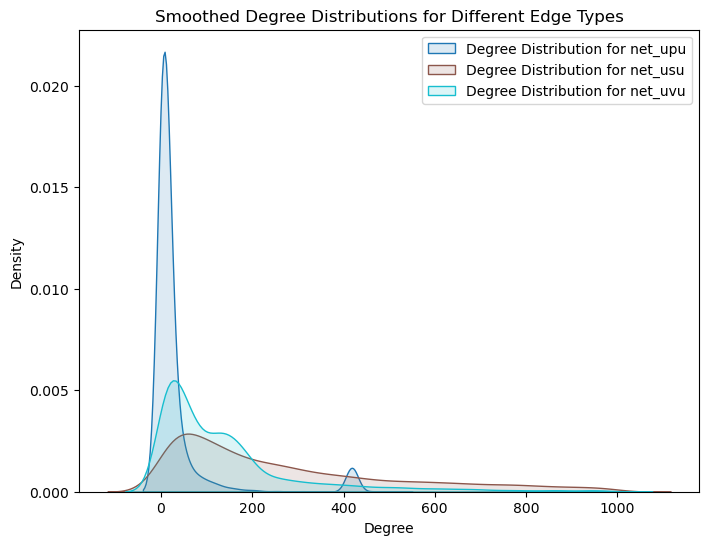

Label distribution for user: {0: 0.9312625586068319, 1: 0.06873744139316812}


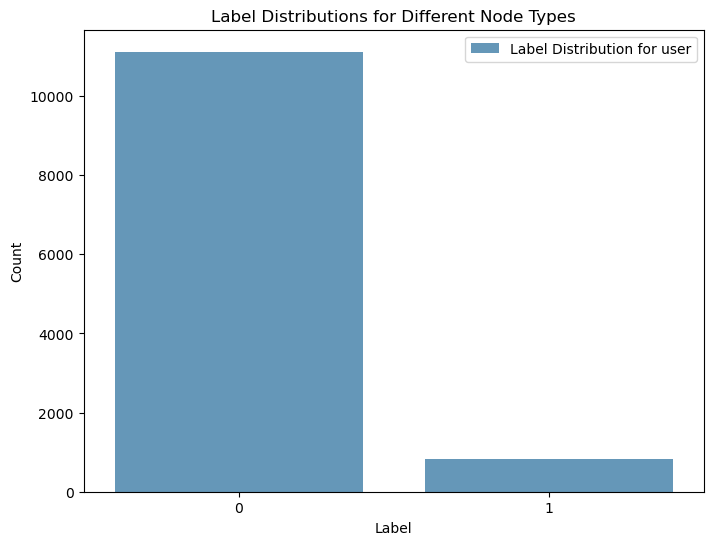

In [25]:
# Print details about the heterogeneous graph
print("Node types:", graph.ntypes)
print("Edge types:", graph.etypes)

# Number of nodes and edges per type
for ntype in graph.ntypes:
    print(f"Number of {ntype} nodes:", graph.num_nodes(ntype))

# Feature dimension
for ntype in graph.ntypes:
    print(f"Feature dimension for {ntype} nodes:", graph.nodes[ntype].data['feature'].shape[1])

# Number of edges per type and maximum degree
for etype in graph.etypes:
    print(f"Number of {etype} edges:", graph.num_edges(etype))

    
# Define a colormap for differentiating the distributions
colors = plt.cm.get_cmap('tab10', len(graph.etypes))

# Compute degree distribution for each edge type
# Set up a single plot
plt.figure(figsize=(8, 6))

# Loop through each edge type and plot its degree distribution
for i, etype in enumerate(graph.etypes):
    _, dst = graph.edges(etype=etype)
    unique, counts = np.unique(dst.numpy(), return_counts=True)
    print(f"Maximum degree for {etype}:", counts.max())
    cut_off = 1000
    
    sns.kdeplot(counts[counts < cut_off], label=f'Degree Distribution for {etype}',
                color=colors(i), log_scale=[False, False], fill=True, alpha=0.15)

# Add plot details
plt.title('Smoothed Degree Distributions for Different Edge Types')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.legend()
plt.show()

# Label distribution
# print label ratio
for ntype in graph.ntypes:
    labels = graph.nodes[ntype].data['label']
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    print(f"Label distribution for {ntype}:", dict(zip(unique, counts / counts.sum())))
# Set up a single plot
plt.figure(figsize=(8, 6))

# Loop through each node type and plot its label distribution
for i, ntype in enumerate(graph.ntypes):
    labels = graph.nodes[ntype].data['label']
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    
    sns.barplot(x=unique, y=counts, label=f'Label Distribution for {ntype}', color=colors(i), alpha=0.75)

# Add plot details
plt.title('Label Distributions for Different Node Types')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()

In [26]:
DATASET_NAME = "yelp" # "amazon" or "yelp"
TRAIN_SIZE = 0.8
VAL_SIZE = 0.1
RANDOM_SEED = 42
FORCE_RELOAD = False

In [27]:
fraud_data = fraud_dataset.FraudDataset(
    DATASET_NAME, 
    train_size=TRAIN_SIZE, 
    val_size=VAL_SIZE, 
    random_seed=RANDOM_SEED, 
    force_reload=FORCE_RELOAD
)
graph = fraud_data[0]

/home/kaifeng/.dgl/yelp.zip: 100%|██████████| 18.0M/18.0M [00:00<00:00, 31.7MB/s]


Extracting file to /home/kaifeng/.dgl/yelp_a7a80596
Done saving data into cached files.


Node types: ['review']
Edge types: ['net_rsr', 'net_rtr', 'net_rur']
Number of review nodes: 45954
Feature dimension for review nodes: 32
Number of net_rsr edges: 6805486
Number of net_rtr edges: 1147232
Number of net_rur edges: 98630
Maximum degree for net_rsr: 465
Maximum degree for net_rtr: 118


/tmp/ipykernel_19802/784111285.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(graph.etypes))


Maximum degree for net_rur: 46


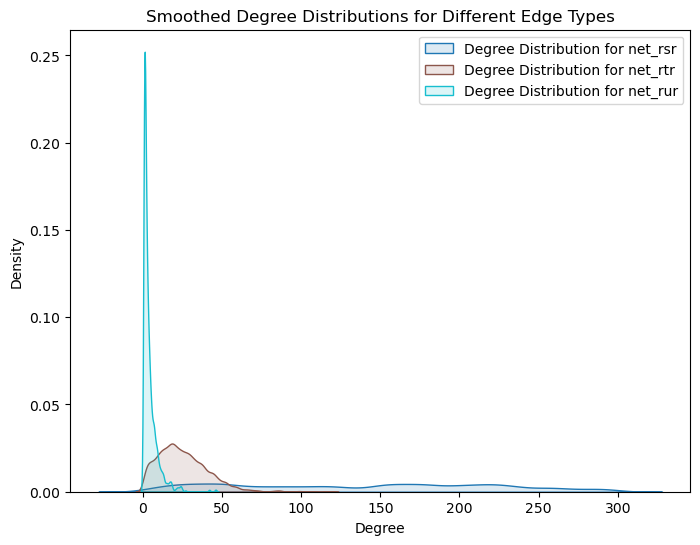

Label distribution for review: {0: 0.854702528615572, 1: 0.14529747138442792}


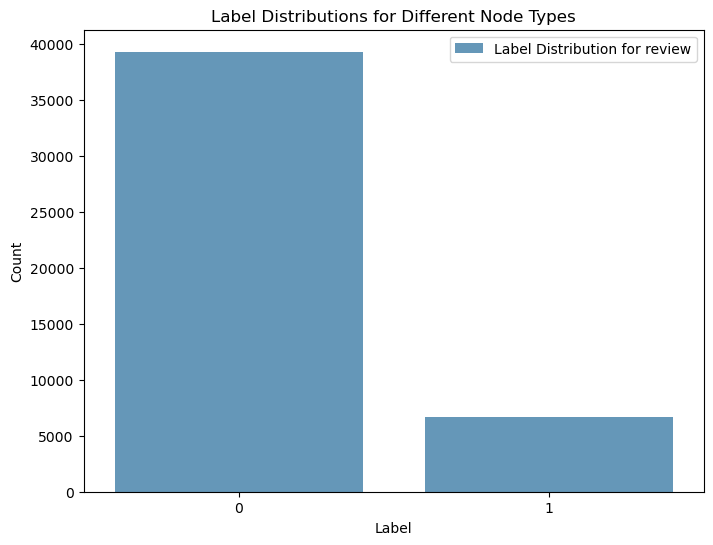

In [30]:
# Print details about the heterogeneous graph
print("Node types:", graph.ntypes)
print("Edge types:", graph.etypes)

# Number of nodes and edges per type
for ntype in graph.ntypes:
    print(f"Number of {ntype} nodes:", graph.num_nodes(ntype))

# Feature dimension
for ntype in graph.ntypes:
    print(f"Feature dimension for {ntype} nodes:", graph.nodes[ntype].data['feature'].shape[1])

# Number of edges per type and maximum degree
for etype in graph.etypes:
    print(f"Number of {etype} edges:", graph.num_edges(etype))

    
# Define a colormap for differentiating the distributions
colors = plt.cm.get_cmap('tab10', len(graph.etypes))

# Compute degree distribution for each edge type
# Set up a single plot
plt.figure(figsize=(8, 6))

# Loop through each edge type and plot its degree distribution
for i, etype in enumerate(graph.etypes):
    _, dst = graph.edges(etype=etype)
    unique, counts = np.unique(dst.numpy(), return_counts=True)
    print(f"Maximum degree for {etype}:", counts.max())
    cut_off = 300
    
    sns.kdeplot(counts[counts < cut_off], label=f'Degree Distribution for {etype}',
                color=colors(i), log_scale=[False, False], fill=True, alpha=0.15)

# Add plot details
plt.title('Smoothed Degree Distributions for Different Edge Types')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.legend()
plt.show()

# Label distribution
# print label ratio
for ntype in graph.ntypes:
    labels = graph.nodes[ntype].data['label']
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    print(f"Label distribution for {ntype}:", dict(zip(unique, counts / counts.sum())))
# Set up a single plot
plt.figure(figsize=(8, 6))

# Loop through each node type and plot its label distribution
for i, ntype in enumerate(graph.ntypes):
    labels = graph.nodes[ntype].data['label']
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    
    sns.barplot(x=unique, y=counts, label=f'Label Distribution for {ntype}', color=colors(i), alpha=0.75)

# Add plot details
plt.title('Label Distributions for Different Node Types')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()